<img src="https://chatgpt.com/backend-api/public_content/enc/eyJpZCI6Im1fNjgwODUxZmNiMDhjODE5MTlhZmJhOGFiM2RjNjg5Njg6ZmlsZV8wMDAwMDAwMDM3ZmM2MjMwYTEzZDE2ZDY5NjRjOTJjZiIsInRzIjoiNDg0ODI2IiwicCI6InB5aSIsInNpZyI6ImU3YmUwOTEyZDAzNzQ4ZmJhZDZhYjQxZTc2OWJlYmI0YmYzNDViODNjMzg2MzczY2MzYzg1ZTljMTFkZTc1OTAiLCJ2IjoiMCIsImdpem1vX2lkIjpudWxsfQ=="  width="700px" height="350px" style="float:right;width:50px;height:50px;">


# <center> **Diabetes prediction model - IA project 2025-1** </center>


## **Content**
1. [**Data presentation & visualization**](#eje1)
2. [**Data preparation**](#eje2)
3. [**Understanding the features & proportions**](#eje3)
4. [**Implementing some models**](#eje4)
5. [**Evaluating and making metrics**](#eje5)



# Library & Utils

In [ ]:
#@title Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Presentation & Visualization of the Data <a name="eje1"></a>

In [ ]:
#@title Import the CSV
df_main = pd.read_csv("https://drive.google.com/uc?id=11_h-56BUAzW1gkWnI8ViuKioeKYtrd-M")
df_aux = pd.read_csv("https://drive.google.com/uc?id=1-gEgJ7qcjSJysy0ntEJuJIxwBodiwMeM")


In [ ]:
df_aux.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df_main

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Data preparation <a name="eje3"></a>

In [ ]:
columns_to_drop = [
    'CholCheck',
    'Smoker',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'Sex',
    'Education',
    'GenHlth',
    'Age',
    'Income',
    'BMI',
    'MentHlth',
    'PhysHlth',
    'DiffWalk',
    'NoDocbcCost',
    'HighBP'
]
df_aux.drop(columns=columns_to_drop)

,Diabetes_binary,HighChol,Stroke,HeartDiseaseorAttack
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
253675,0.0,1.0,0.0,0.0
253676,1.0,1.0,0.0,0.0
253677,0.0,0.0,0.0,0.0
253678,0.0,0.0,0.0,0.0


In [ ]:
# Eliminar la columna 'smoking_history'
df_main = df_main.drop(columns=['smoking_history'])

# Transformar la columna 'gender' para que sea binaria (1 para 'Male', 0 para 'Female')
df_main['gender'] = df_main['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Verificar los primeros registros para asegurarnos de que la transformación fue correcta
df_main.head()


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0


In [ ]:


# Subconjunto de columnas útiles en df_aux
cols_aux = ['Diabetes_binary', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']

# Creamos subconjuntos filtrados según Diabetes_binary
df_aux_1 = df_aux[df_aux['Diabetes_binary'] == 1][cols_aux].reset_index(drop=True)
df_aux_0 = df_aux[df_aux['Diabetes_binary'] == 0][cols_aux].reset_index(drop=True)

# Separar df_main por grupos de diabetes
df_main_1 = df_main[df_main['diabetes'] == 1].reset_index(drop=True)
df_main_0 = df_main[df_main['diabetes'] == 0].reset_index(drop=True)

# Muestreo aleatorio sin reemplazo desde df_aux para asignar features
df_aux_1_sample = df_aux_1.sample(n=len(df_main_1), random_state=42).reset_index(drop=True)
df_aux_0_sample = df_aux_0.sample(n=len(df_main_0), random_state=42).reset_index(drop=True)

# Añadir las columnas auxiliares a cada grupo
df_main_1_augmented = pd.concat([df_main_1.reset_index(drop=True), df_aux_1_sample], axis=1)
df_main_0_augmented = pd.concat([df_main_0.reset_index(drop=True), df_aux_0_sample], axis=1)

# Unimos nuevamente todo el dataset
df_final = pd.concat([df_main_1_augmented, df_main_0_augmented], axis=0).reset_index(drop=True)

# Comprobación final
print("Dimensiones finales del dataset enriquecido:", df_final.shape)
print("\nDistribución de la variable diabetes:")
print(df_final['diabetes'].value_counts(normalize=True))

print("\nEjemplo de columnas agregadas:")
print(df_final[['diabetes', 'Diabetes_binary', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']].head())



Dimensiones finales del dataset enriquecido: (100000, 12)

Distribución de la variable diabetes:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

Ejemplo de columnas agregadas:
   diabetes  Diabetes_binary  HighChol  Stroke  HeartDiseaseorAttack
0         1              1.0       1.0     0.0                   0.0
1         1              1.0       1.0     0.0                   0.0
2         1              1.0       0.0     0.0                   1.0
3         1              1.0       0.0     0.0                   1.0
4         1              1.0       1.0     0.0                   0.0


In [ ]:
df_final

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Diabetes_binary,HighChol,Stroke,HeartDiseaseorAttack
0,0,44.0,0,0,19.31,6.5,200,1,1.0,1.0,0.0,0.0
1,1,67.0,0,1,27.32,6.5,200,1,1.0,1.0,0.0,0.0
2,1,50.0,1,0,27.32,5.7,260,1,1.0,0.0,0.0,1.0
3,1,73.0,0,0,25.91,9.0,160,1,1.0,0.0,0.0,1.0
4,0,53.0,0,0,27.32,7.0,159,1,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0,0.0,0.0,0.0,0.0
99996,0,2.0,0,0,17.37,6.5,100,0,0.0,0.0,0.0,0.0
99997,1,66.0,0,0,27.83,5.7,155,0,0.0,1.0,0.0,0.0
99998,0,24.0,0,0,35.42,4.0,100,0,0.0,0.0,0.0,0.0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                100000 non-null  int64  
 1   age                   100000 non-null  float64
 2   hypertension          100000 non-null  int64  
 3   heart_disease         100000 non-null  int64  
 4   bmi                   100000 non-null  float64
 5   HbA1c_level           100000 non-null  float64
 6   blood_glucose_level   100000 non-null  int64  
 7   diabetes              100000 non-null  int64  
 8   Diabetes_binary       100000 non-null  float64
 9   HighChol              100000 non-null  float64
 10  Stroke                100000 non-null  float64
 11  HeartDiseaseorAttack  100000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 9.2 MB


In [ ]:
df_final.drop(columns='Diabetes_binary', inplace=True)


### GRAFICOS

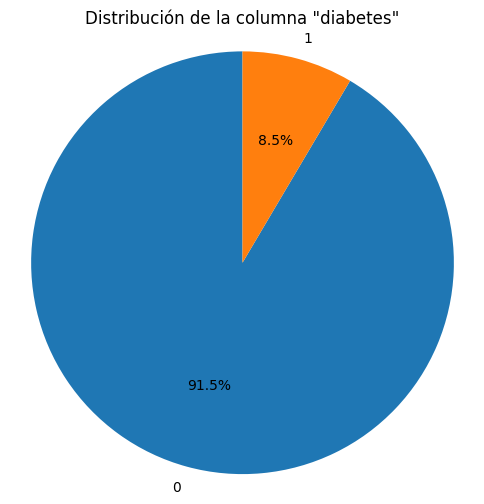

In [ ]:
#@title Distribución de la variable objetivo
conteo = df_main['diabetes'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de la columna "diabetes"')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.show()

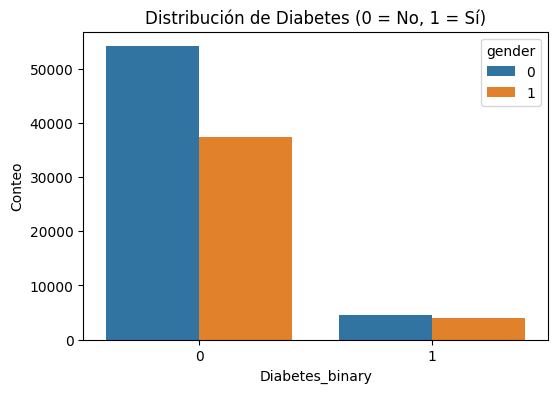

In [ ]:
#@title Distribución de la variable objetivo por genero
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df_main, hue='gender')
plt.title('Distribución de Diabetes (0 = No, 1 = Sí)')
plt.xlabel('Diabetes_binary')
plt.ylabel('Conteo')
plt.show()

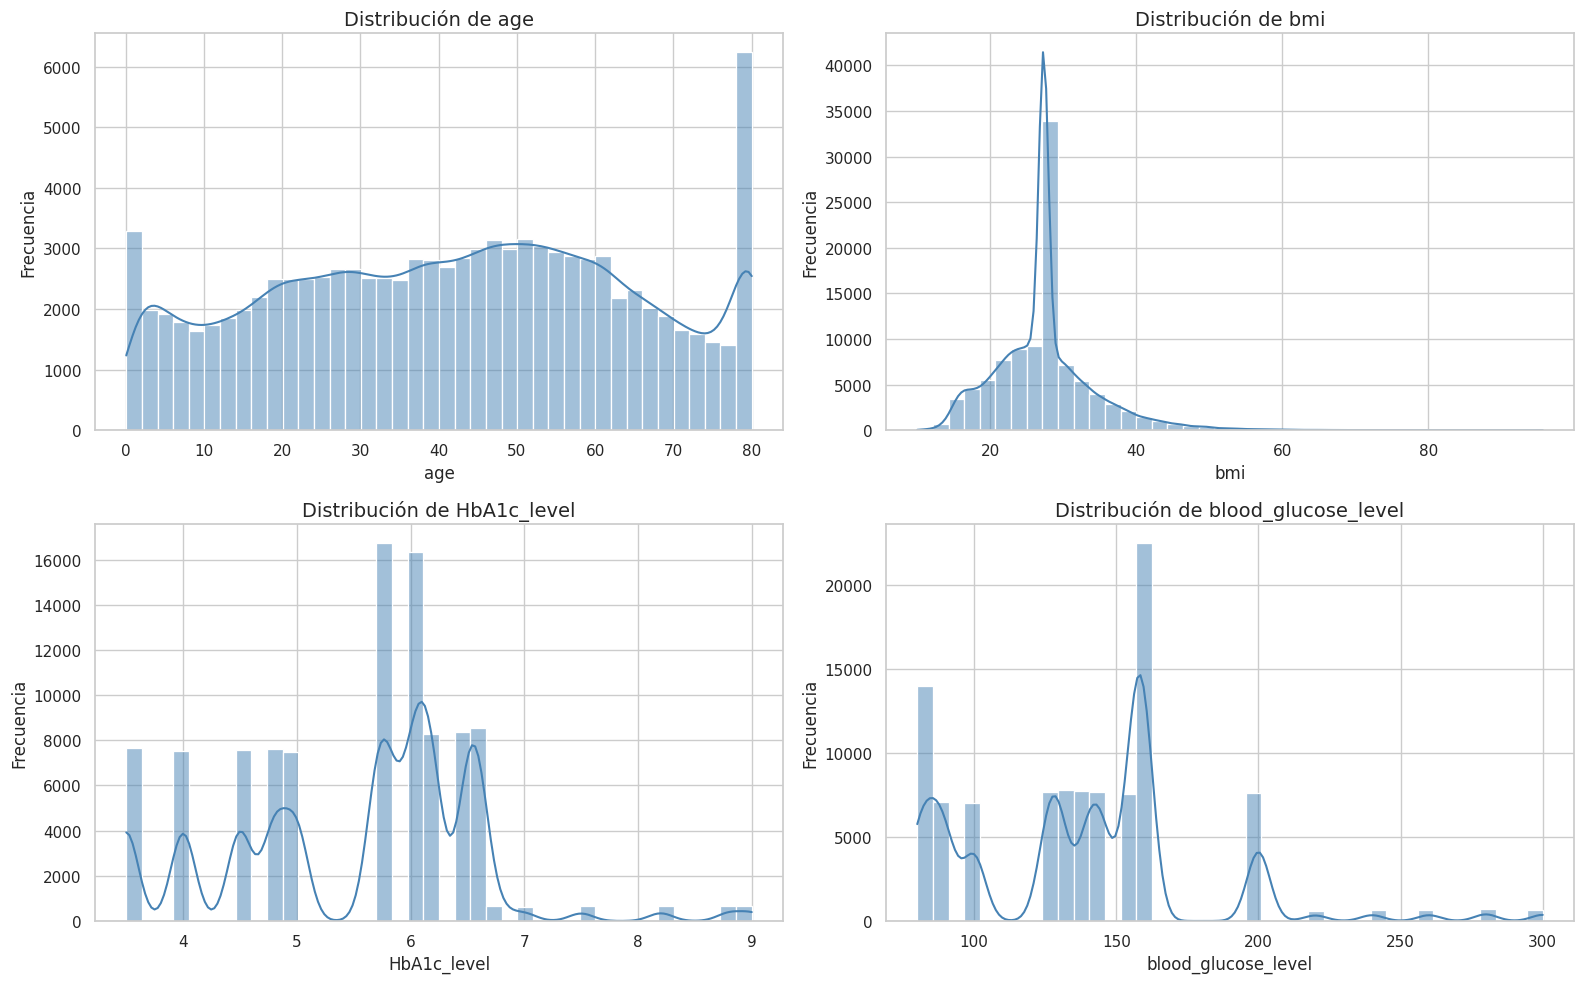

In [ ]:
#@title Histogramas
# Estilo general
sns.set(style="whitegrid")

# Lista de columnas que quieres visualizar
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Crear un gráfico por cada feature
plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_final[feature], kde=True, bins=40, color='steelblue')
    plt.title(f'Distribución de {feature}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


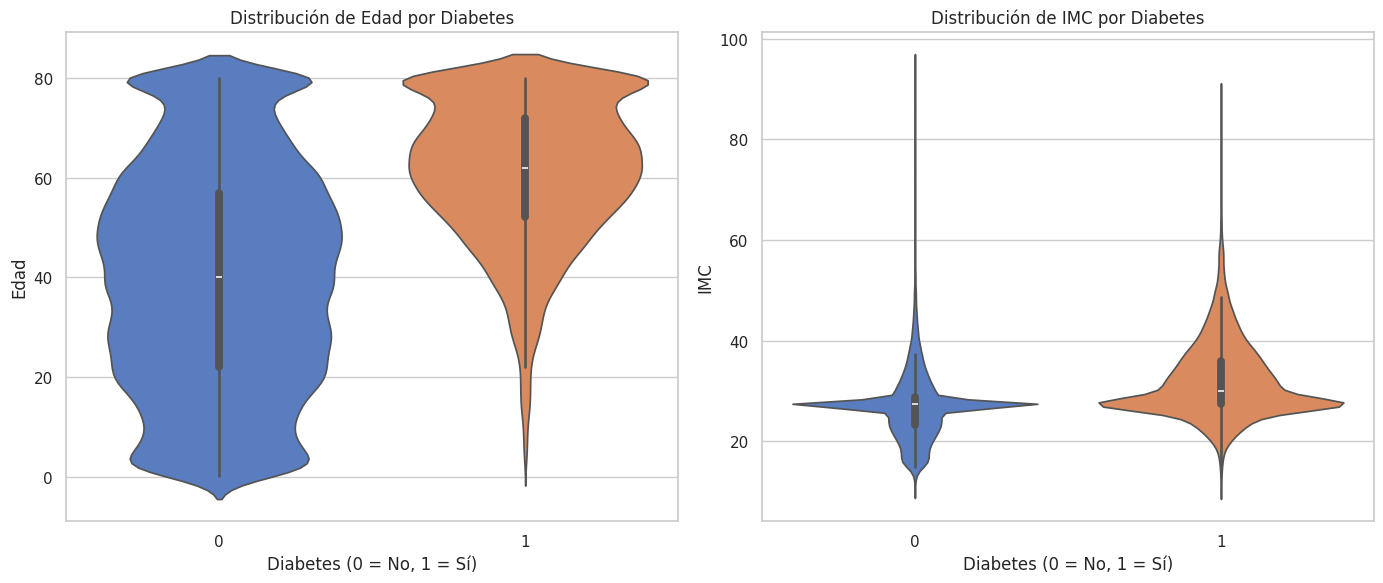

In [ ]:
#@title Visualización de variables
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(14, 6))

# Diagrama de violín para edad
plt.subplot(1, 2, 1)
sns.violinplot(x='diabetes', y='age', hue='diabetes', data=df_final, palette='muted', legend=False)
plt.title('Distribución de Edad por Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Sí)')
plt.ylabel('Edad')

# Diagrama de violín para IMC
plt.subplot(1, 2, 2)
sns.violinplot(x='diabetes', y='bmi', hue='diabetes', data=df_final, palette='muted', legend=False)
plt.title('Distribución de IMC por Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Sí)')
plt.ylabel('IMC')

plt.tight_layout()
plt.show()



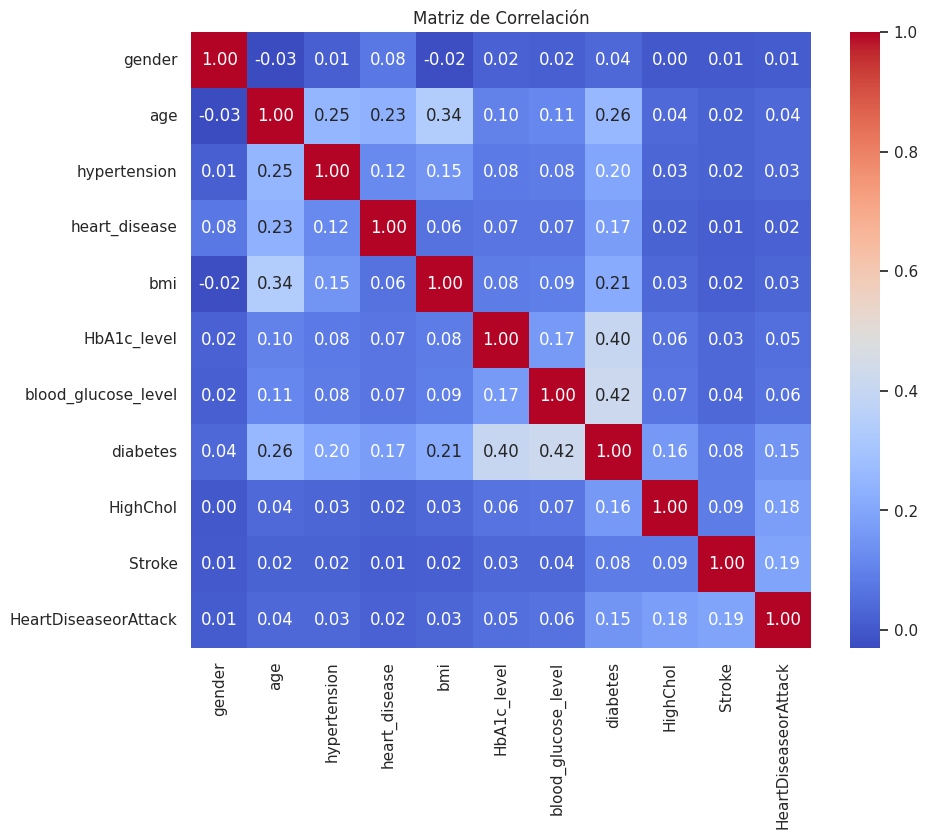

In [ ]:
#@title Correlacion
# Matriz de correlación
corr = df_final.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

### **Entrenamiento ML Supervisado clasificadores**

In [ ]:
#@title GNB
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
# 1. Features y target desde el dataset original (sin balancear aún)
X = df_final[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender',
              'hypertension', 'heart_disease', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']]
y = df_final['diabetes']

# 2. Train/test split (dividir ANTES de balancear)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Aplicar SMOTE solo en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 4. Entrenamiento con datos balanceados
model = GaussianNB()
model.fit(X_train_res, y_train_res)

# 5. Predicción sobre datos reales (sin SMOTE)
y_pred = model.predict(X_test)

# 6. Evaluación
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92     18307
           1       0.36      0.83      0.50      1693

    accuracy                           0.86     20000
   macro avg       0.67      0.85      0.71     20000
weighted avg       0.93      0.86      0.88     20000



In [ ]:
#@title Decision Tree

# Entrenamiento con Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicción
y_pred_dt = dt_model.predict(X_test)

# Evaluación
print("Decision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     18307
           1       0.74      0.75      0.75      1693

    accuracy                           0.96     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
#@title RandomForest

# Entrenamiento con Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicción
y_pred_rf = rf_model.predict(X_test)

# Evaluación
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18307
           1       0.92      0.71      0.80      1693

    accuracy                           0.97     20000
   macro avg       0.95      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
#@title Logistic Regression

# Entrenamiento del modelo
Regresion_Logistic = LogisticRegression(class_weight='balanced', random_state=16)
Regresion_Logistic.fit(X_train, y_train)
y_pred = Regresion_Logistic.predict(X_test)
y_pred_train = Regresion_Logistic.predict(X_train)
print("Logistic Regression- Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression- Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     18307
           1       0.44      0.87      0.58      1693

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#@title Super Vector Machine

svm_model = SVC(kernel='linear')

# Entrenar el modelo con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = svm_model.predict(X_test)

print("Super Vector Machine  - Classification Report:\n", classification_report(y_test, y_pred))


Super Vector Machine  - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18307
           1       0.90      0.61      0.73      1693

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



### Machine Learnig no supervisado


In [ ]:
#@title PCA + RandomForest

# Número de componentes principales
Components = 9  #@param {type:"integer"}

# Separar variables independientes y dependiente (por ejemplo: 'diabetes')
X = df_final.drop(columns=['diabetes'])
y = df_final['diabetes']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Modelo base sin PCA
est = RandomForestClassifier(
    n_estimators=200,         # número de árboles del bosque
    max_depth=10,             # profundidad máxima de cada árbol
    min_samples_split=5,      # mínimo de muestras para dividir un nodo
    min_samples_leaf=2,       # mínimo de muestras en una hoja
    max_features='sqrt',      # número de características a considerar al buscar la mejor división
    bootstrap=True,           # usar muestreo con reemplazo
    random_state=42,          # reproducibilidad
    n_jobs=-1,                # usar todos los núcleos del CPU
    class_weight='balanced'   # útil si tienes clases desbalanceadas
)
est.fit(X_train, y_train)
y_est = est.predict(X_test)

print("X_test (sin PCA):", X_test.shape)
print("Accuracy (sin PCA):", accuracy_score(y_test, y_est))

# PCA
pca = PCA(n_components=Components, whiten=True)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

# Modelo con datos reducidos por PCA
est = RandomForestClassifier(
    n_estimators=200,         # número de árboles del bosque
    max_depth=10,             # profundidad máxima de cada árbol
    min_samples_split=5,      # mínimo de muestras para dividir un nodo
    min_samples_leaf=2,       # mínimo de muestras en una hoja
    max_features='sqrt',      # número de características a considerar al buscar la mejor división
    bootstrap=True,           # usar muestreo con reemplazo
    random_state=42,          # reproducibilidad
    n_jobs=-1,                # usar todos los núcleos del CPU
    class_weight='balanced'   # útil si tienes clases desbalanceadas
)
est.fit(X_pca_train, y_train)
y_est = est.predict(X_pca_test)

print("X_test (con PCA):", X_pca_test.shape)
print("Accuracy (con PCA):", accuracy_score(y_test, y_est))


X_test (sin PCA): (20000, 10)
Accuracy (sin PCA): 0.9163
X_test (con PCA): (20000, 9)
Accuracy (con PCA): 0.92065


In [ ]:
#@title Usando solo metodos de agrupación
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Selección de características (puedes cambiar los índices feature1 y feature2 arriba)
feature1 = 2  #@param {type:"integer"}
feature2 = 5  #@param {type:"integer"}

# Datos
X = df_final.drop(columns=['diabetes'])
y = df_final['diabetes']

# Extrae solo las columnas seleccionadas
X_selected = X.iloc[:, [feature1, feature2]].values

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Aplicar KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)


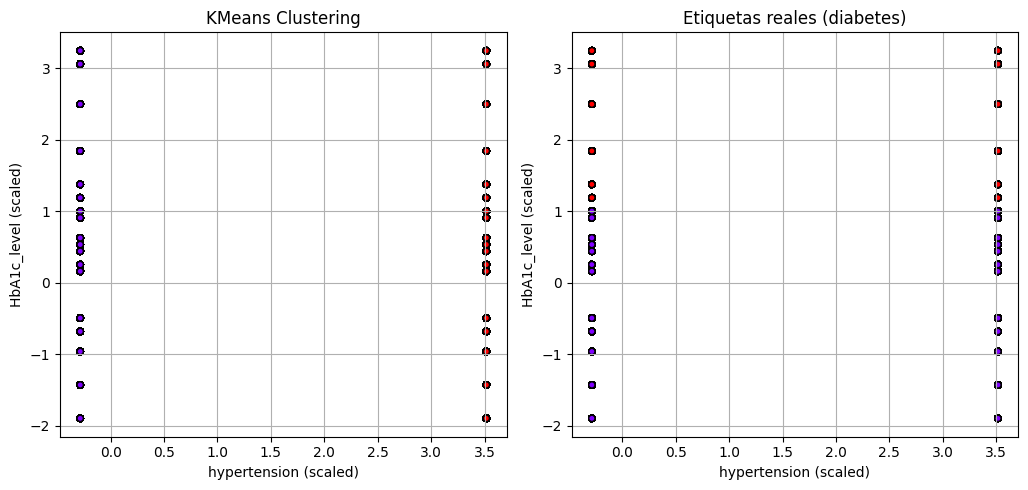

In [ ]:
# Visualización
plt.figure(figsize=(15, 5))

# Gráfico KMeans
plt.subplot(132)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='rainbow', edgecolor='k', s=20)
plt.title("KMeans Clustering")
plt.xlabel(f"{X.columns[feature1]} (scaled)")
plt.ylabel(f"{X.columns[feature2]} (scaled)")
plt.grid(True)

# Gráfico con etiquetas reales
plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='rainbow', edgecolor='k', s=20)
plt.title("Etiquetas reales (diabetes)")
plt.xlabel(f"{X.columns[feature1]} (scaled)")
plt.ylabel(f"{X.columns[feature2]} (scaled)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#@title **Ingreso de Datos del Usuario**
Edad = 25  #@param {type:"number"}
Género = "Masculino"  #@param ["Masculino", "Femenino"]
Altura = 1.78  #@param {type:"number"}
Peso = 70  #@param {type:"number"}
HbA1c = 7.0  #@param {type:"number"}
Glucosa = 170  #@param {type:"number"}
Hipertensión = "No"  #@param ["Sí", "No"]
Cardiopatía = "No"  #@param ["Sí", "No"]
Colesterol_Alto = "No"  #@param ["Sí", "No"]
Derrame_Cerebral = "No"  #@param ["Sí", "No"]
Ataque_Cardiaco = "No"  #@param ["Sí", "No"]
Componentes_PCA = 9

# -------------------- Procesamiento de Datos del Usuario --------------------
# Mapear valores categóricos
genero_map = {'Femenino': 0, 'Masculino': 1}
binario_map = {'No': 0, 'Sí': 1}

# Variables codificadas
genero = genero_map[Género]
bmi = Peso / (Altura ** 2)
hipertension = binario_map[Hipertensión]
cardiopatia = binario_map[Cardiopatía]
colesterol = binario_map[Colesterol_Alto]
stroke = binario_map[Derrame_Cerebral]
ataque = binario_map[Ataque_Cardiaco]

# Crear DataFrame con datos del usuario
datos_usuario = pd.DataFrame([{
    'gender': genero,
    'age': Edad,
    'hypertension': hipertension,
    'heart_disease': cardiopatia,
    'bmi': bmi,
    'HbA1c_level': HbA1c,
    'blood_glucose_level': Glucosa,
    'HighChol': colesterol,
    'Stroke': stroke,
    'HeartDiseaseorAttack': ataque
}])

# -------------------- Preparación del Dataset --------------------


# Separar variables independientes y dependiente
X = df_final.drop(columns=['diabetes'])
y = df_final['diabetes']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Aplicar SMOTE SOLO al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# -------------------- Modelo Sin PCA --------------------
modelo_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
modelo_rf.fit(X_train, y_train)

# Evaluación sin PCA
y_pred = modelo_rf.predict(X_test)
print("Shape de X_test (sin PCA):", X_test.shape)
print("Accuracy sin PCA:", accuracy_score(y_test, y_pred))

# Predicción sin PCA
datos_usuario_scaled = scaler.transform(datos_usuario)
prediccion_usuario_sin_pca = modelo_rf.predict(datos_usuario_scaled)[0]

# -------------------- Modelo Con PCA --------------------
pca = PCA(n_components=Componentes_PCA, whiten=True)
pca.fit(X_train)

X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)
usuario_pca = pca.transform(datos_usuario_scaled)

modelo_rf_pca = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
modelo_rf_pca.fit(X_pca_train, y_train)

# Evaluación con PCA
y_pred_pca = modelo_rf_pca.predict(X_pca_test)
print("Shape de X_test (con PCA):", X_pca_test.shape)
print("Accuracy con PCA:", accuracy_score(y_test, y_pred_pca))

# Predicción con PCA
prediccion_usuario_con_pca = modelo_rf_pca.predict(usuario_pca)[0]


# ---------------------Modelo

# -------------------- Resultado Final --------------------
print("\n--- RESULTADO DE PREDICCIÓN ---")
if prediccion_usuario_sin_pca == 1:
    print("🔴 El modelo SIN PCA predice que TIENE diabetes.")
else:
    print("🟢 El modelo SIN PCA predice que NO tiene diabetes.")

if prediccion_usuario_con_pca == 1:
    print("🔴 El modelo CON PCA predice que TIENE diabetes.")
else:
    print("🟢 El modelo CON PCA predice que NO tiene diabetes.")


Shape de X_test (sin PCA): (20000, 10)
Accuracy sin PCA: 0.9163
Shape de X_test (con PCA): (20000, 9)
Accuracy con PCA: 0.92065

--- RESULTADO DE PREDICCIÓN ---
🔴 El modelo SIN PCA predice que TIENE diabetes.
🟢 El modelo CON PCA predice que NO tiene diabetes.
